In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab6/Img_063.jpeg
!ls

Img_063.jpeg  sample_data


#TODO
1. Load picture 
2. Detect edges
3. Detect two radii
4. Apply hough transform
5. Select the most prominent 4 circles
6. Draw circles



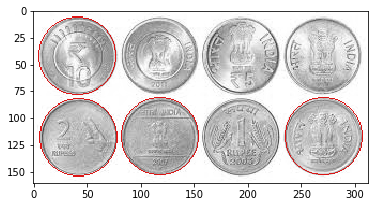

In [0]:
from skimage import io
from skimage import feature
from skimage import data, color
from skimage.util import img_as_ubyte
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
import matplotlib.pyplot as plt
import numpy as np

# Load picture
img0 = io.imread('Img_063.jpeg', True)

img0 = img_as_ubyte(img0)

# Detect edges
edges = feature.canny(img0, sigma=3)

# Detect two radii
radii = np.arange(30, 40, 2) # according to the image for each coin about 60-75, so choose the radii about 30-40

# Apply hough transform
res = hough_circle(edges, radii)

# Select the most prominent 4 circles
accums, cx, cy, radii = hough_circle_peaks(res, radii, total_num_peaks=4)

# Draw circles
fig, ax = plt.subplots()
img0 = color.gray2rgb(img0)
for center_y, center_x, radius in zip(cy, cx, radii):
  # Generate circle perimeter coordinates.
  circy, circx = circle_perimeter(center_y, center_x, radius, shape=img0.shape)
  # Indices of pixels that belong to the circle perimeter, draw the red edge around circle
  img0[circy, circx] = (220,20,20)

ax.imshow(img0, cmap=plt.cm.gray)
plt.show()
